In [2]:
pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=075b9524854cf11d832ee4bff3ad4ba9e2354492ec71bff75748000ead7f8981
  Stored in directory: /Users/nigorakhonganieva/Library/Caches/pip/wheels/cb/9b/84/26c4ed30c02e893caea7e0d9e1bb45e0fb2e06998250c64f5e
Successfully built liac-arff
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.impute import SimpleImputer

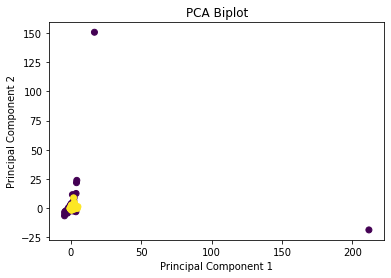

In [8]:
# after loading the ARFF file, I convert it into python dataframe.
data = arff.loadarff('polish_data/5year.arff')
df = pd.DataFrame(data[0])
df = df.dropna()
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Biplot')
plt.show()